In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 붓꽃 데이터..
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# EDA

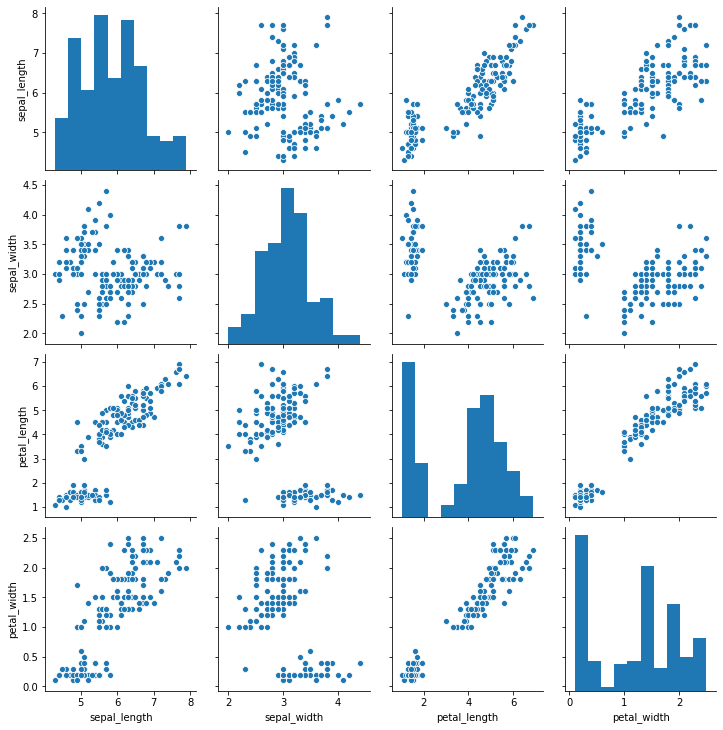

In [6]:
sns.pairplot(df)

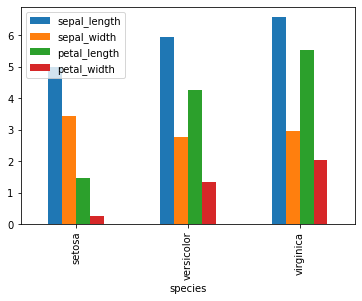

In [8]:
df.groupby('species').mean().plot(kind='bar')

In [9]:
# 1. x, y divide

y = df.species
x = df.drop('species', axis=1)

In [11]:
# 2. train data, test data split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [15]:
# 3. Algorithm import

from sklearn.svm import SVC
svc = SVC()

In [16]:
# 4. Train => model

svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# 5. model = > predict

predictions = svc.predict(x_test)

In [19]:
# 6. model evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [20]:
# Optimizatioin

# 'C' : 오차를 얼마나 허용할 것인지
# 'gamma': 데이터의 영향범위를 어느정도 수준으로 할지..

In [21]:
# GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
params = {
    'C': [0.1, 1, 10, 100],
    'gamma':[1, 0, 0.1, 0.01, 0.001]
}

In [49]:
grid = GridSearchCV(SVC(), params, refit=True, verbose=True, scoring='accuracy')

In [50]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=True)

In [51]:
grid.best_score_

0.975

In [52]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [29]:
preds = grid.predict(x_test)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

